<br>
<br>
<br>

# Topics: 

- `Random Imputer.`

- `Missing Indicator.`

- `Grid Search CV.`

<br>
<br>
<br>

<br>

# Random Imputer:

<br>

In [181]:

import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 

from sklearn.model_selection import train_test_split



In [182]:
df = pd.read_csv("dataset/train.csv",usecols=["Age","Fare","Survived"])
df.head(4)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000


In [183]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [184]:
X = df.drop(columns=["Survived"])
y = df["Survived"]

In [185]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [186]:
X_train["Age_impute"] = X_train["Age"]
X_test["Age_impute"] = X_test["Age"]
X_test.sample(2)

,Age,Fare,Age_impute
486,35.0,90.0,35.0
617,26.0,16.1,26.0


In [187]:
X_train["Age_impute"].isnull().sum()

148

In [188]:

# values convert it to numpy array()
X_train["Age"].dropna().sample(1).values 


array([36.])

<br>

#### Fill missing value with from random column :

<br>

In [189]:

X_train["Age_impute"][X_train["Age_impute"].isnull()] = X_train["Age"].dropna().sample(X_train["Age"].isnull().sum()).values
 

/tmp/ipykernel_3970/1731167706.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train["Age_impute"][X_train["Age_impute"].isnull()] = X_train["Age"].dropna().sample(X_train["Age"].isnull().sum()).values


In [190]:

# to avoid warning wire the syntax like this:

X_test.loc[X_test["Age_impute"].isnull(), "Age_impute"] = X_test["Age"].dropna().sample(X_test["Age_impute"].isnull().sum()).values


In [191]:
X_train

,Age,Fare,Age_impute
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,53.0
493,71.0,49.5042,71.0
527,NaN,221.7792,64.0


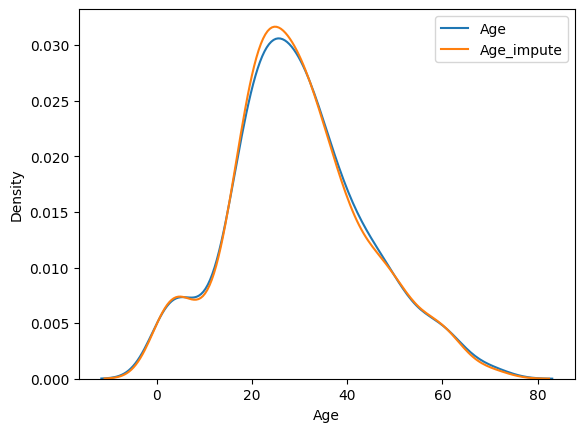

In [192]:


sns.kdeplot(data=X_train,x="Age",label="Age")
sns.kdeplot(data=X_train,x="Age_impute",label="Age_impute")
plt.legend()

# distribution almost same : good for liner model:


In [193]:

# variance is almost same (Good for linear model)

print(f"Variance of Age: {X_train["Age"].var()}")
print(f"Variance of Age_impute : {X_train["Age_impute"].var()}")


Variance of Age: 204.34951339046142
Variance of Age_impute : 199.88975348772897


In [194]:

# co-variance is change much ( 71.51 >>>> 56.40 )

X_train[["Fare",'Age',"Age_impute"]].cov()


,Fare,Age,Age_impute
Fare,2368.246832,71.512440,60.080410
Age,71.512440,204.349513,204.349513
Age_impute,60.080410,204.349513,199.889753


<Axes: >

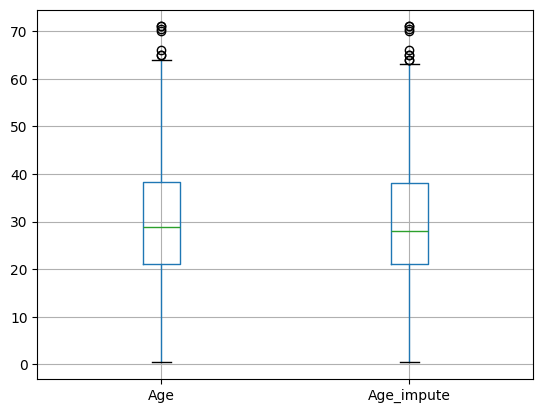

In [195]:
X_train[["Age","Age_impute"]].boxplot()

`In production when a user give same vaule of Fare multiple times then he/she will see different age value. Cause, everytime we select the age randomly . It's not good for user exprience. So, we will give the same random value of a constant Fare value: `

In [196]:
sample_value = X_train["Age"].dropna().sample(1,random_state=int(X_train["Fare"][0]))
sample_value

666    25.0
Name: Age, dtype: float64

<br>
<br>
<br>
<br>
<br>

# Now, For Categorical Data:

<br>
<br>
<br>
<br>
<br>

In [197]:

data = pd.read_csv("dataset/housing_train.csv",usecols=["GarageQual","FireplaceQu","SalePrice"])
data.sample(3)


,FireplaceQu,GarageQual,SalePrice
701,NaN,TA,140000
464,NaN,NaN,124000
542,TA,TA,213250


In [198]:

data.isnull().mean() * 100


FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [199]:

X = data # inclue the target column: 

y = data["SalePrice"]



In [200]:

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2,test_size=0.2)


In [201]:

X_train["GarageQual_impute"] = X_train["GarageQual"]
X_test["GarageQual_impute"] = X_train["GarageQual"]

X_train["FireplaceQu_impute"] = X_train["FireplaceQu"]
X_test["FireplaceQu_impute"] = X_train["FireplaceQu"]


In [203]:
X_test["FireplaceQu_impute"].isnull().sum()

292

In [204]:
X_test["FireplaceQu_impute"].isnull().sum()

292

In [210]:

# For X_train
X_train.loc[X_train["FireplaceQu_impute"].isnull(), "FireplaceQu_impute"] = X_train["FireplaceQu"].dropna().sample(X_train["FireplaceQu_impute"].isnull().sum()).values
X_train.loc[X_train["GarageQual_impute"].isnull(), "GarageQual_impute"] = X_train["GarageQual"].dropna().sample(X_train["GarageQual_impute"].isnull().sum()).values

# For X_test
X_test.loc[X_test["FireplaceQu_impute"].isnull(), "FireplaceQu_impute"] = X_test["FireplaceQu"].dropna().sample(X_test["FireplaceQu_impute"].isnull().sum()).values
X_test.loc[X_test["GarageQual_impute"].isnull(), "GarageQual_impute"] = X_test["GarageQual"].dropna().sample(X_test["GarageQual_impute"].isnull().sum()).values



In [217]:
# Check the frequency of each category in the missing categorical column before and after impution :

before = X_train["GarageQual"].value_counts() / len(X_train["GarageQual"].dropna())
after = X_train["GarageQual_impute"].value_counts() / len(X_train["GarageQual_impute"])

# Concatenate the results horizontally and create a DataFrame
temp = pd.concat([before, after], axis=1)

# Rename the columns
temp.columns = ["Orginal", "Imputated"]

# result is almost same
temp


,Orginal,Imputated
TA,0.951043,0.949486
Fa,0.037171,0.039384
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [219]:
# Check the frequency of each category in the missing categorical column before and after impution :

before = X_test["GarageQual"].value_counts() / len(X_test["GarageQual"].dropna())
after = X_test["GarageQual_impute"].value_counts() / len(X_test["GarageQual_impute"])

# Concatenate the results horizontally and create a DataFrame
temp = pd.concat([before, after], axis=1)

# Rename the columns
temp.columns = ["Orginal", "Imputated"]

# result is almost same
temp


,Orginal,Imputated
TA,0.949275,0.941781
Fa,0.025362,0.020548
Gd,0.010870,0.023973
Ex,0.007246,0.010274
Po,0.007246,0.003425


`আমাদের আগে ও পরে প্রত্যেকটা Category percentage প্রায়ই সমান । তাহলে লিনিয়ার মডেল এর ক্ষেত্রে তেমন কোন সমস্যা হবে না । যদি অনেক difference বেশি হতো তাহলে আমাদের অন্য কোন missing value technique apply করতে হতো । `


<br>

### See, the Graph:

<br>

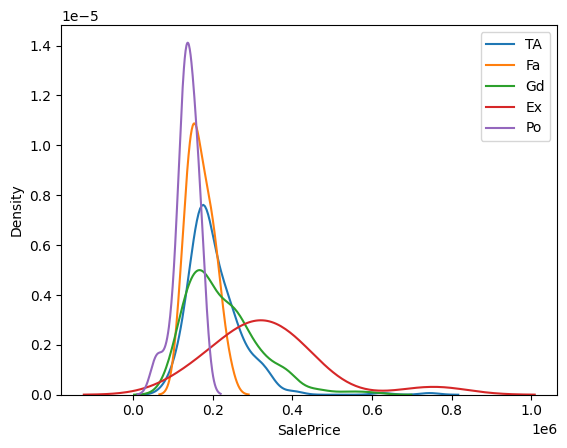

In [224]:

# sell price is our target column: we can now compare all the unique catagory to saleprice

for category in X_train["FireplaceQu"].dropna().unique():
    sns.kdeplot(X_train[X_train["FireplaceQu"]==category]["SalePrice"],label=category)
plt.legend()

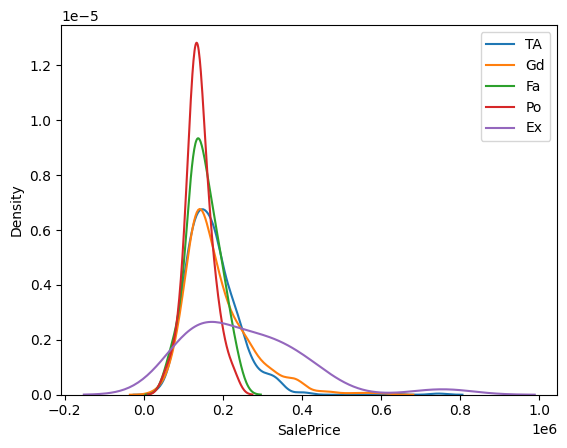

In [225]:

# sell price is our target column: we can now compare all the unique catagory to saleprice

for category in X_train["FireplaceQu_impute"].dropna().unique():
    sns.kdeplot(X_train[X_train["FireplaceQu_impute"]==category]["SalePrice"],label=category)
plt.legend()